In [1]:
import pandas as pd
from itertools import combinations
import rna_seq_functions as rna
import importlib
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyensembl
import json
import plot_formatters as fmt
import aggregate_functions as agg
import os

## Load RNA Seq Data

In [2]:
scramble_data_dir = '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/scrambles'
experiment_data_dir = '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/experiments/bridged'
gene_list_dir = '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/filtered_gene_lists'

percent_cell_threshold = .5
umi_threshold = 3
gene_set_length = 2156


gene_list_file_name = os.path.join(
    gene_list_dir,
    'filtered_gene-list_pcells-' \
    + str(percent_cell_threshold) \
    + '_umicount-' + str(umi_threshold) \
    + '_len-' + str(gene_set_length) + '.npy'
)
COLOR_PALETTES = json.load(open('lib/color_palettes.json', 'r'))

In [3]:
replicates = [f.split('_')[0] for f in os.listdir(experiment_data_dir) if f.split('.')[-1] == 'csv']
replicates

['AN7', 'AN6']

## Myeloid Clone: D-MOLD bs E-MOLD

In [4]:
labels_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/Graphs/balanced_clone_abundance/MOLD_Bias_labels.csv').dropna()
myeloid_labels_df = labels_df[labels_df.label_name == 'MB'].rename(columns={'label_name': 'bias', 'group': 'label_name'})
myel_labels = myeloid_labels_df.label_name.unique()
label_comparisons = list(combinations(myel_labels, 2))
myeloid_labels_df.groupby('label_name').code.nunique()

label_name
aging_phenotype    168
no_change           72
Name: code, dtype: int64

In [6]:
importlib.reload(rna)

rna.labels_in_data_summary_stat(
    experiment_data_dir,
    replicates,
    labels_df,
    ['mouse_id', 'group', 'label_name']
)


 AN7 Unique Clones Per Mouse:
  mouse_id            group label_name  code  CBC
0      M12  aging_phenotype         MB     4   25
1      M16        no_change         MB     2  968
2       M3  aging_phenotype         MB     1    1
3       M5        no_change         LB     1    1
4       M5        no_change         MB     1    1
5       M6        no_change         MB     1   10
6       M7        no_change         LB     2    5
7       M7        no_change         MB     5    6

 AN6 Unique Clones Per Mouse:
   mouse_id            group label_name  code   CBC
0       M12  aging_phenotype         MB     4    57
1       M16        no_change         MB     3  3178
2        M3  aging_phenotype         LB     1     1
3        M3  aging_phenotype         MB     5    10
4        M5        no_change         LB     1     2
5        M5        no_change         MB     3     6
6        M6        no_change          B     1     1
7        M6        no_change         LB     1     1
8        M6        n

In [24]:
importlib.reload(rna)
print(label_comparisons)
comparison_df, mapped_clones, experiment_rna_data_df = rna.generate_rna_seq_label_comparison_df(
    experiment_data_dir,
    scramble_data_dir,
    replicates,
    n_scrambles=5,
    labels_df=myeloid_labels_df,
    label_comparisons=label_comparisons,
    filter_genes=True,
    filter_genes_path=gene_list_file_name
)

[('aging_phenotype', 'no_change')]
Filtering Genes Using List From: /Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/filtered_gene_lists/filtered_gene-list_pcells-0.5_umicount-3_len-2156.npy
Working on: AN7 experiment ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('aging_phenotype', 'no_change')
Done.
Working on: AN7 scramble-0 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('aging_phenotype', 'no_change')
Done.
Working on: AN7 scramble-1 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('aging_phenotype', 'no_change')
Done.
Working on: AN7 scramble-2 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('aging_phenotype', 'no_change')
Done.
Working on: AN7 scramble-3 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After 

In [25]:
comparison_df.to_csv(
    '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_MB_Comparison_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv',
    index=False
)
experiment_rna_data_df.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_MB_RNA_expression_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv', index=False)
mapped_clones.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_MB_mapped_clones_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv', index=False)

In [26]:
experiment_rna_data_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_MB_RNA_expression_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv')
mapped_clones = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_MB_mapped_clones_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv')

In [27]:
comparison_df = pd.read_csv(
    '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_MB_Comparison_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv',
)
comparison_df[comparison_df.experiment_type == 'experiment'][['replicate', 'experiment_type' ,'comparison', 'count_0', 'count_1', 'l0', 'l1']].drop_duplicates().sort_values(by=['replicate', 'comparison'])

,replicate,experiment_type,comparison,count_0,count_1,l0,l1
12936,AN6,experiment,aging_phenotype vs no_change,67,3226,aging_phenotype,no_change
0,AN7,experiment,aging_phenotype vs no_change,26,985,aging_phenotype,no_change


In [28]:
importlib.reload(rna)

isolate_replicate_cols = [
    'gene_id',
    'experiment_type',
    'comparison']

start = time.process_time()

replicate_combined_df = rna.combine_group_p_values(
    comparison_df,
    isolate_replicate_cols
)
stop = time.process_time()
print('Time Elapsed:', stop - start, 'seconds')

Time Elapsed: 11.812038999999913 seconds


In [29]:
importlib.reload(rna)

start = time.process_time()

experiment_with_greater_fpr_df = rna.calculate_fpr_genes_vs_comparisons(
    comparison_df=replicate_combined_df,
    isolate_gene_cols=['experiment_type', 'comparison'],
    p_value_col='p_value_greater',
    p_value_cutoff=0.1,
)
experiment_with_less_fpr_df = rna.calculate_fpr_genes_vs_comparisons(
    comparison_df=replicate_combined_df,
    isolate_gene_cols=['experiment_type', 'comparison'],
    p_value_col='p_value_less',
    p_value_cutoff=0.1,
)
experiment_with_fpr_df = experiment_with_greater_fpr_df.merge(
    experiment_with_less_fpr_df,
    how='outer',
    validate='1:1'
)
stop = time.process_time()

print('Time Elapsed:', stop - start, 'seconds')

# of P-Values: 2156
# of P-Values less than or equal to  0.1 180


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# of P-Values: 2156
# of P-Values less than or equal to  0.1 352
Time Elapsed: 0.2813139999998384 seconds


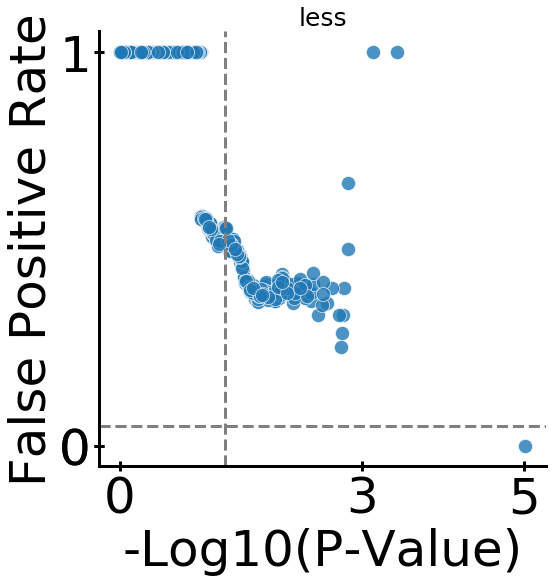

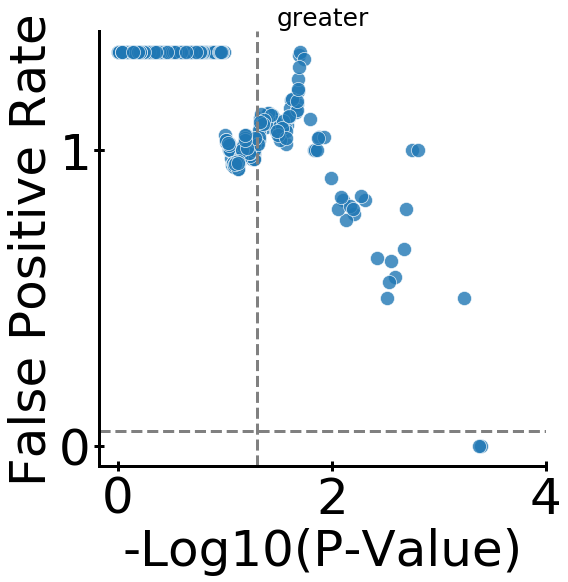

In [30]:
ensembl = pyensembl.EnsemblRelease(species='mus musculus')
gene_names = []
for gene_id in experiment_with_fpr_df.gene_id:
        try:
            gene_names.append(ensembl.gene_by_id(gene_id).gene_name)
        except ValueError:
            gene_names.append(gene_id)

experiment_with_fpr_df['gene_name'] = gene_names
mpl.rcParams['font.size'] = 50
for direction in ['less', 'greater']:
    fig, ax = plt.subplots(figsize=(8, 8))
    linewidth=3
    s=200
    sns.scatterplot(
        x='nlt_p_value_'+direction,
        y='p_value_' + direction + '_fpr',
        data=experiment_with_fpr_df,
        s=s,
        alpha=0.8
    )
    ax.axhline(y=0.05, linestyle='dashed', c='gray', linewidth=linewidth)
    ax.axvline(x=-1 * np.log10(0.05), linestyle='dashed', c='gray', linewidth=linewidth)

    plt.ylabel('False Positive Rate')
    plt.xlabel('-Log10(P-Value)')
    fmt.add_grid_despine_linewidth(ax, linewidth=linewidth, grid=False)
    fmt.tick_at_end_of_axis(ax, n_ticks=3, round_tick_end=False, hide_min=False, round_ticks=True, round_base=0.1)    
    plt.title(direction, fontsize=25)


In [32]:
pass_fpr_and_p_df = experiment_with_fpr_df[
    (
        (
            (experiment_with_fpr_df.p_value_greater < 0.05) &\
            (experiment_with_fpr_df.p_value_greater_fpr < 0.05)
        ) |\
        (
            (experiment_with_fpr_df.p_value_less < 0.05) &\
            (experiment_with_fpr_df.p_value_less_fpr < 0.05)
        )
    )
]
pass_fpr_and_p_df[['comparison', 'gene_name','p_value_greater', 'p_value_less', 'log2fc', 'fold_change', 'p_value_greater_fpr', 'p_value_less_fpr']]

,comparison,gene_name,p_value_greater,p_value_less,log2fc,fold_change,p_value_greater_fpr,p_value_less_fpr
667,aging_phenotype vs no_change,Pfdn1,0.000405,0.998769,0.288907,1.222166,0.000000,1.0
1246,aging_phenotype vs no_change,Polr2c,0.000422,0.998162,0.338006,1.272820,0.000000,1.0
2110,aging_phenotype vs no_change,Xist,0.999975,0.000010,-0.965712,0.512092,1.333333,0.0


In [33]:
sig_genes = pass_fpr_and_p_df[['comparison','gene_name', 'gene_id', 'fold_change']]
sig_genes = sig_genes[sig_genes.gene_name != 'Xist']
sig_gene_expression = experiment_rna_data_df.merge(
    sig_genes,
    how='inner',
    validate='m:m'
)

Working on: aging_phenotype vs no_change


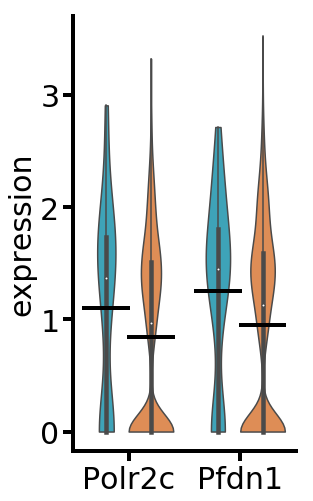

In [34]:
mpl.rcParams['font.size'] = 30
linewidth = 4
for comp, c_df in sig_genes.groupby('comparison'):
    print('Working on:', comp)
    sig_gene_expression = experiment_rna_data_df.merge(
        c_df,
        how='inner',
        validate='m:1'
    )
    l1_l2_df = sig_gene_expression[sig_gene_expression.label_name.isin(comp.split(' '))]
    fig, ax = plt.subplots(figsize=(2 * c_df.gene_id.nunique(), 8))
    linewidth=4
    sns.violinplot(
        y='expression',
        x='gene_name',
        hue='label_name',
        data=l1_l2_df,
        ax=ax,
        palette=COLOR_PALETTES['group'],
        hue_order=['aging_phenotype', 'no_change'],
        dodge=True,
        zorder=0,
        cut=0

    )
    medianprops = dict(
        linewidth=0,
    )
    meanprops = dict(
        linestyle='solid',
        linewidth=4,
        color='black'
    )


    sns.boxplot(
        y='expression',
        x='gene_name',
        hue='label_name',
        hue_order=['aging_phenotype', 'no_change'],
        data=l1_l2_df,
        ax=ax,
        fliersize=0,
        showbox=False,
        whiskerprops={
            "alpha": 0
        },
        dodge=True,
        showcaps=False,
        showmeans=True,
        meanline=True,
        meanprops=meanprops,
        medianprops=medianprops,
    )
    ax.legend().remove()
    sns.despine()
    fmt.change_axis_linewidth(ax, linewidth)
    #ax.tick_params(axis='x', rotation=35)
    ax.set_xlabel('')

## D-MOLD vs EMOLD

In [7]:
labels_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/Graphs/clone_count_swarm/MOLD_labels.csv').dropna()

labels = labels_df.label_name.unique()
label_comparisons = list(combinations(labels, 2))
label_comparisons

[('no_change', 'aging_phenotype')]

In [8]:
importlib.reload(rna)

rna.labels_in_data_summary_stat(
    experiment_data_dir,
    replicates,
    labels_df,
    ['mouse_id', 'label_name']
)


 AN7 Unique Clones Per Mouse:
  mouse_id       label_name  code  CBC
0      M12  aging_phenotype     5   26
1      M16        no_change     2  968
2       M3  aging_phenotype     1    1
3       M5        no_change     3    3
4       M6        no_change     6   44
5       M7        no_change    10   18

 AN6 Unique Clones Per Mouse:
  mouse_id       label_name  code   CBC
0      M12  aging_phenotype     4    57
1      M16        no_change     5  3181
2       M3  aging_phenotype     6    11
3       M5        no_change    11    18
4       M6        no_change    12   147
5       M7        no_change    12    32


In [31]:
importlib.reload(rna)
print(label_comparisons)
comparison_df, mapped_clones, experiment_rna_data_df = rna.generate_rna_seq_label_comparison_df(
    experiment_data_dir,
    scramble_data_dir,
    replicates,
    n_scrambles=5,
    labels_df=labels_df,
    label_comparisons=label_comparisons,
    filter_genes=True,
    filter_genes_path=gene_list_file_name
)

[('no_change', 'aging_phenotype')]
Filtering Genes Using List From: /Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/filtered_gene_lists/filtered_gene-list_pcells-0.5_umicount-3_len-2156.npy
Working on: AN7 experiment ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('no_change', 'aging_phenotype')
Done.
Working on: AN7 scramble-0 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('no_change', 'aging_phenotype')
Done.
Working on: AN7 scramble-1 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('no_change', 'aging_phenotype')
Done.
Working on: AN7 scramble-2 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('no_change', 'aging_phenotype')
Done.
Working on: AN7 scramble-3 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After 

In [32]:
comparison_df.to_csv(
    '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_Comparison_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv',
    index=False
)
experiment_rna_data_df.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_RNA_expression_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv', index=False)
mapped_clones.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_mapped_clones_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv', index=False)

In [33]:
experiment_rna_data_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_RNA_expression_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv')
mapped_clones = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_mapped_clones_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv')

In [34]:
comparison_df = pd.read_csv(
    '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/MOLD_Comparison_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv',
)
comparison_df[comparison_df.experiment_type == 'experiment'][['replicate', 'experiment_type' ,'comparison', 'count_0', 'count_1', 'l0', 'l1']].drop_duplicates().sort_values(by=['replicate', 'comparison'])

,replicate,experiment_type,comparison,count_0,count_1,l0,l1
12936,AN6,experiment,no_change vs aging_phenotype,3378,68,no_change,aging_phenotype
0,AN7,experiment,no_change vs aging_phenotype,1033,27,no_change,aging_phenotype


In [35]:
importlib.reload(rna)

isolate_replicate_cols = [
    'gene_id',
    'experiment_type',
    'comparison']

start = time.process_time()

replicate_combined_df = rna.combine_group_p_values(
    comparison_df,
    isolate_replicate_cols
)
stop = time.process_time()
print('Time Elapsed:', stop - start, 'seconds')

Time Elapsed: 12.059810999999854 seconds


In [36]:
importlib.reload(rna)

start = time.process_time()

experiment_with_greater_fpr_df = rna.calculate_fpr_genes_vs_comparisons(
    comparison_df=replicate_combined_df,
    isolate_gene_cols=['experiment_type', 'comparison'],
    p_value_col='p_value_greater',
    p_value_cutoff=0.1,
)
experiment_with_less_fpr_df = rna.calculate_fpr_genes_vs_comparisons(
    comparison_df=replicate_combined_df,
    isolate_gene_cols=['experiment_type', 'comparison'],
    p_value_col='p_value_less',
    p_value_cutoff=0.1,
)
experiment_with_fpr_df = experiment_with_greater_fpr_df.merge(
    experiment_with_less_fpr_df,
    how='outer',
    validate='1:1'
)
stop = time.process_time()

print('Time Elapsed:', stop - start, 'seconds')

# of P-Values: 2156
# of P-Values less than or equal to  0.1 335
# of P-Values: 2156
# of P-Values less than or equal to  0.1 184
Time Elapsed: 0.3052989999998772 seconds


In [37]:
ensembl = pyensembl.EnsemblRelease(species='mus musculus')
gene_names = []
for gene_id in experiment_with_fpr_df.gene_id:
        try:
            gene_names.append(ensembl.gene_by_id(gene_id).gene_name)
        except ValueError:
            gene_names.append(gene_id)

experiment_with_fpr_df['gene_name'] = gene_names

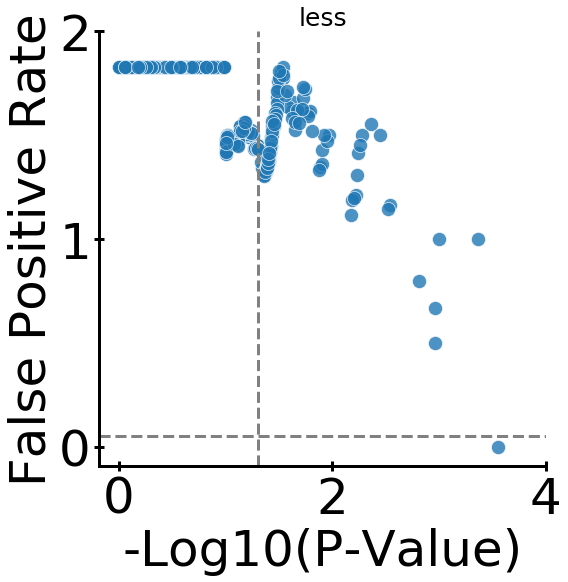

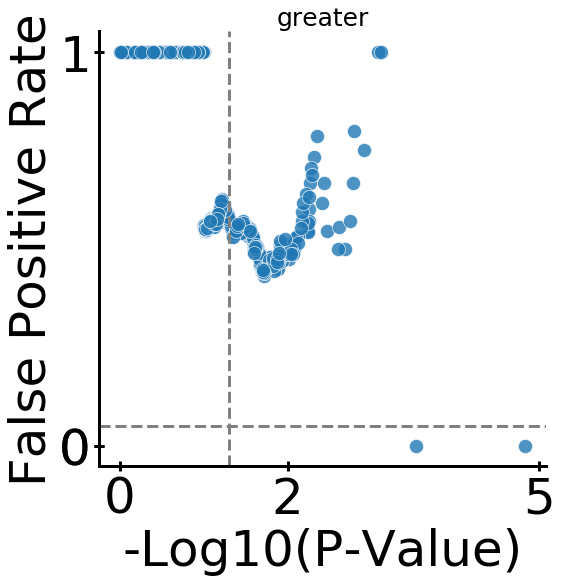

In [38]:
mpl.rcParams['font.size'] = 50
for direction in ['less', 'greater']:
    fig, ax = plt.subplots(figsize=(8, 8))
    linewidth=3
    s=200
    sns.scatterplot(
        x='nlt_p_value_'+direction,
        y='p_value_' + direction + '_fpr',
        data=experiment_with_fpr_df,
        s=s,
        alpha=0.8
    )
    ax.axhline(y=0.05, linestyle='dashed', c='gray', linewidth=linewidth)
    ax.axvline(x=-1 * np.log10(0.05), linestyle='dashed', c='gray', linewidth=linewidth)

    plt.ylabel('False Positive Rate')
    plt.xlabel('-Log10(P-Value)')
    fmt.add_grid_despine_linewidth(ax, linewidth=linewidth, grid=False)
    fmt.tick_at_end_of_axis(ax, n_ticks=3, round_tick_end=False, hide_min=False, round_ticks=True, round_base=0.1)    
    plt.title(direction, fontsize=25)


In [39]:
pass_fpr_and_p_df = experiment_with_fpr_df[
    (
        (
            (experiment_with_fpr_df.p_value_greater < 0.05) &\
            (experiment_with_fpr_df.p_value_greater_fpr < 0.05)
        ) |\
        (
            (experiment_with_fpr_df.p_value_less < 0.05) &\
            (experiment_with_fpr_df.p_value_less_fpr < 0.05)
        )
    )
]
pass_fpr_and_p_df[['comparison', 'gene_name','p_value_greater', 'p_value_less', 'log2fc', 'fold_change', 'p_value_greater_fpr', 'p_value_less_fpr']]

,comparison,gene_name,p_value_greater,p_value_less,log2fc,fold_change,p_value_greater_fpr,p_value_less_fpr
752,no_change vs aging_phenotype,Rps26,0.000294,0.991567,0.224314,1.173402,0.0,1.829787
1246,no_change vs aging_phenotype,Polr2c,0.997015,0.000283,-0.338636,0.797248,1.0,0.000000
2110,no_change vs aging_phenotype,Xist,0.000015,0.999984,0.944245,1.924459,0.0,1.829787


In [40]:
sig_genes = pass_fpr_and_p_df[['comparison','gene_name', 'gene_id', 'fold_change']]
sig_genes = sig_genes[sig_genes.gene_name != 'Xist']
sig_gene_expression = experiment_rna_data_df.merge(
    sig_genes,
    how='inner',
    validate='m:m'
)

Working on: no_change vs aging_phenotype


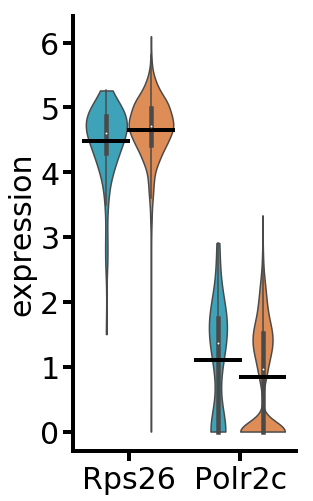

In [43]:
mpl.rcParams['font.size'] = 30
linewidth = 4
for comp, c_df in sig_genes.groupby('comparison'):
    print('Working on:', comp)
    sig_gene_expression = experiment_rna_data_df.merge(
        c_df,
        how='inner',
        validate='m:1'
    )
    l1_l2_df = sig_gene_expression[sig_gene_expression.label_name.isin(comp.split(' '))]
    fig, ax = plt.subplots(figsize=(2 * c_df.gene_id.nunique(), 8))
    linewidth=4
    sns.violinplot(
        y='expression',
        x='gene_name',
        hue='label_name',
        data=l1_l2_df,
        ax=ax,
        palette=COLOR_PALETTES['group'],
        hue_order=['aging_phenotype', 'no_change'],
        dodge=True,
        zorder=0,
        cut=0

    )
    medianprops = dict(
        linewidth=0,
    )
    meanprops = dict(
        linestyle='solid',
        linewidth=4,
        color='black'
    )


    sns.boxplot(
        y='expression',
        x='gene_name',
        hue='label_name',
        hue_order=['aging_phenotype', 'no_change'],
        data=l1_l2_df,
        ax=ax,
        fliersize=0,
        showbox=False,
        whiskerprops={
            "alpha": 0
        },
        dodge=True,
        showcaps=False,
        showmeans=True,
        meanline=True,
        meanprops=meanprops,
        medianprops=medianprops,
    )
    ax.legend().remove()
    sns.despine()
    fmt.change_axis_linewidth(ax, linewidth)
    #ax.tick_params(axis='x', rotation=35)
    ax.set_xlabel('')

## Exhaustion Label Comparison

In [11]:
labels_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/Graphs/exhaust_persist_hsc_abund/0-05/exhaustion_labels.csv').rename(columns={'survived': 'label_name'})
labels = labels_df.label_name.unique()
print(labels)
label_comparisons = list(combinations(labels, 2))
label_comparisons

['Survived']


[]

In [12]:
importlib.reload(rna)

rna.labels_in_data_summary_stat(
    experiment_data_dir,
    replicates,
    labels_df,
    ['mouse_id', 'label_name']
)

KeyboardInterrupt: 

In [ ]:
importlib.reload(rna)
comparison_df, mapped_clones, experiment_rna_data_df = rna.generate_rna_seq_label_comparison_df(
    experiment_data_dir,
    scramble_data_dir,
    replicates,
    n_scrambles=5,
    labels_df=labels_df,
    label_comparisons=label_comparisons,
    filter_genes=True,
    filter_genes_path=gene_list_file_name
)

In [8]:
importlib.reload(rna)
comparison_df, mapped_clones, experiment_rna_data_df = rna.generate_rna_seq_label_comparison_df(
    experiment_data_dir,
    scramble_data_dir,
    replicates,
    n_scrambles=5,
    labels_df=labels_df,
    label_comparisons=label_comparisons,
    filter_genes=True,
    filter_genes_path=gene_list_file_name
)

Filtering Genes Using List From: /Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/filtered_gene_lists/filtered_gene-list_pcells-0.5_umicount-3_len-2156.npy
Working on: AN7 experiment ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-0 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-1 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-2 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('Exhausted', 'Survived')
Done.
Working on: AN7 scramble-3 ...
	...Importing Data
		 Before filtering genes: 12932000
		 After filtering genes:  2285360
	...Comparing: ('Exhausted', 'Survive

In [9]:
comparison_df.to_csv(
    '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/Exhaust_Comparison_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv',
    index=False
)
experiment_rna_data_df.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/Exhaust_RNA_expression_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv', index=False)
mapped_clones.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/mapped_clones_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv', index=False)

In [10]:
experiment_rna_data_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/Exhaust_RNA_expression_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv')
mapped_clones = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/mapped_clones_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv')

In [11]:
experiment_rna_data_df.groupby('replicate').gene_id.nunique()

replicate
AN6    2156
AN7    2156
Name: gene_id, dtype: int64

In [28]:
experiment_rna_data_df.mouse_id.unique()

array(['M16', 'M12', 'M6', 'M3', 'M7', 'M5'], dtype=object)

In [13]:

comparison_df = pd.read_csv(
    '/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/Exhaust_Comparison_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv',
)
comparison_df[comparison_df.experiment_type == 'experiment'][['replicate', 'experiment_type' ,'comparison', 'count_0', 'count_1', 'l0', 'l1']].drop_duplicates().sort_values(by=['replicate', 'comparison'])

,replicate,experiment_type,comparison,count_0,count_1,l0,l1
12936,AN6,experiment,Exhausted vs Survived,51,3256,Exhausted,Survived
0,AN7,experiment,Exhausted vs Survived,18,1000,Exhausted,Survived


In [14]:
importlib.reload(rna)

isolate_replicate_cols = [
    'gene_id',
    'experiment_type',
    'comparison']

start = time.process_time()

replicate_combined_df = rna.combine_group_p_values(
    comparison_df,
    isolate_replicate_cols
)
stop = time.process_time()
print('Time Elapsed:', stop - start, 'seconds')

Time Elapsed: 12.896682999999939 seconds


In [15]:
replicate_combined_df.to_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/replicate_combined_Exhaust_Comparison_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv', index=False)
replicate_combined_df.head(n=6)

,gene_id,experiment_type,comparison,p_value_less,p_value_greater,fold_change,log2fc
0,ENSMUSG00000000078,experiment,Exhausted vs Survived,0.417111,0.578861,0.945112,-0.086907
1,ENSMUSG00000000078,scramble-0,Exhausted vs Survived,0.085778,0.963255,0.932707,-0.101813
2,ENSMUSG00000000078,scramble-1,Exhausted vs Survived,0.881296,0.078133,1.041023,0.057779
3,ENSMUSG00000000078,scramble-2,Exhausted vs Survived,0.238794,0.831608,0.959390,-0.060933
4,ENSMUSG00000000078,scramble-3,Exhausted vs Survived,0.418029,0.698575,0.981987,-0.026426
5,ENSMUSG00000000078,scramble-4,Exhausted vs Survived,0.910184,0.024517,1.087772,0.117475


In [16]:
replicate_combined_df = pd.read_csv('/Users/akre96/Data/HSC_aging_project/serial_transplant/rna_seq/replicate_combined_Exhaust_Comparison_' + 'P' + str(percent_cell_threshold) + 'N' + str(umi_threshold) + '.csv')


In [17]:
importlib.reload(rna)

start = time.process_time()

experiment_with_greater_fpr_df = rna.calculate_fpr_genes_vs_comparisons(
    comparison_df=replicate_combined_df,
    isolate_gene_cols=['experiment_type', 'comparison'],
    p_value_col='p_value_greater',
    p_value_cutoff=0.1,
)
experiment_with_less_fpr_df = rna.calculate_fpr_genes_vs_comparisons(
    comparison_df=replicate_combined_df,
    isolate_gene_cols=['experiment_type', 'comparison'],
    p_value_col='p_value_less',
    p_value_cutoff=0.1,
)
experiment_with_fpr_df = experiment_with_greater_fpr_df.merge(
    experiment_with_less_fpr_df,
    how='outer',
    validate='1:1'
)
stop = time.process_time()

print('Time Elapsed:', stop - start, 'seconds')

# of P-Values: 2156
# of P-Values less than or equal to  0.1 178


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# of P-Values: 2156
# of P-Values less than or equal to  0.1 313
Time Elapsed: 0.2957969999999932 seconds


In [18]:
ensembl = pyensembl.EnsemblRelease(species='mus musculus')
ensembl.gene_ids()[0]

'ENSMUSG00000000001'

In [19]:
gene_names = []
for gene_id in experiment_with_fpr_df.gene_id:
        try:
            gene_names.append(ensembl.gene_by_id(gene_id).gene_name)
        except ValueError:
            gene_names.append(gene_id)

experiment_with_fpr_df['gene_name'] = gene_names

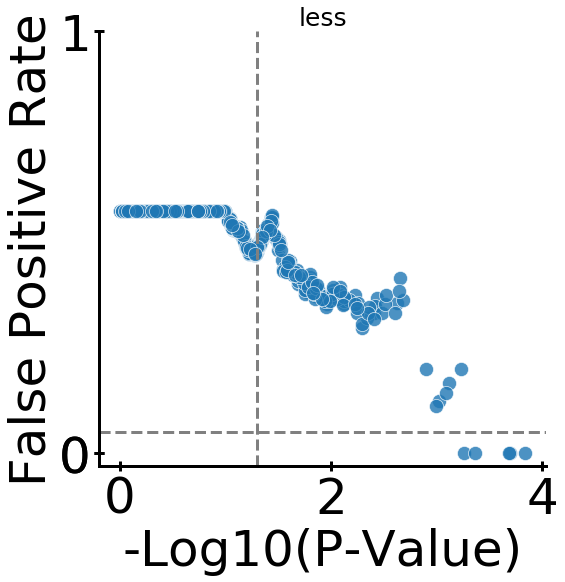

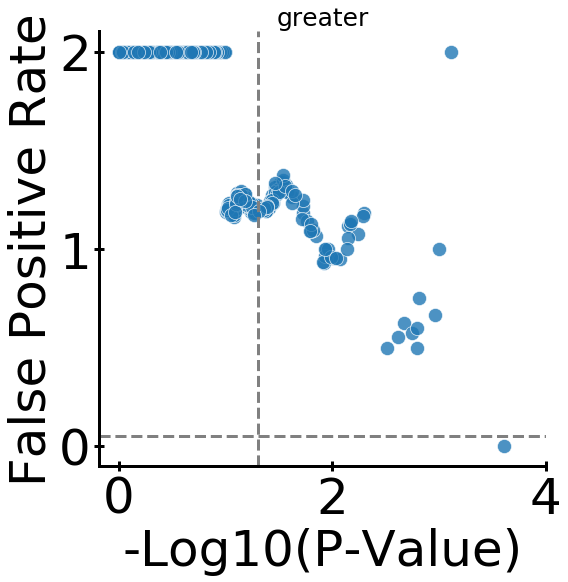

In [20]:
mpl.rcParams['font.size'] = 50
for direction in ['less', 'greater']:
    fig, ax = plt.subplots(figsize=(8, 8))
    linewidth=3
    s=200
    sns.scatterplot(
        x='nlt_p_value_'+direction,
        y='p_value_' + direction + '_fpr',
        data=experiment_with_fpr_df,
        s=s,
        alpha=0.8
    )
    ax.axhline(y=0.05, linestyle='dashed', c='gray', linewidth=linewidth)
    ax.axvline(x=-1 * np.log10(0.05), linestyle='dashed', c='gray', linewidth=linewidth)

    plt.ylabel('False Positive Rate')
    plt.xlabel('-Log10(P-Value)')
    fmt.add_grid_despine_linewidth(ax, linewidth=linewidth, grid=False)
    fmt.tick_at_end_of_axis(ax, n_ticks=3, round_tick_end=False, hide_min=False, round_ticks=True, round_base=0.1)    
    plt.title(direction, fontsize=25)


In [21]:
pass_fpr_and_p_df = experiment_with_fpr_df[
    (
        (
            (experiment_with_fpr_df.p_value_greater < 0.05) &\
            (experiment_with_fpr_df.p_value_greater_fpr < 0.05)
        ) |\
        (
            (experiment_with_fpr_df.p_value_less < 0.05) &\
            (experiment_with_fpr_df.p_value_less_fpr < 0.05)
        )
    )
]
pass_fpr_and_p_df[['comparison', 'gene_name','p_value_greater', 'p_value_less', 'log2fc', 'fold_change', 'p_value_greater_fpr', 'p_value_less_fpr']]

,comparison,gene_name,p_value_greater,p_value_less,log2fc,fold_change,p_value_greater_fpr,p_value_less_fpr
622,Exhausted vs Survived,Ivns1abp,0.999856,0.000557,-0.337186,0.792417,2.0,0.000000
906,Exhausted vs Survived,Car2,0.999964,0.000145,-0.619428,0.654590,2.0,0.000000
1366,Exhausted vs Survived,Pik3ip1,0.000247,0.981965,0.400871,1.331302,0.0,0.573718
1600,Exhausted vs Survived,Dctpp1,0.999443,0.000435,-0.460694,0.726639,2.0,0.000000
2110,Exhausted vs Survived,Xist,0.998094,0.000204,-0.929339,0.528474,2.0,0.000000
2143,Exhausted vs Survived,Psmb9,0.999964,0.000208,-0.518878,0.702798,2.0,0.000000


In [22]:
sig_genes = pass_fpr_and_p_df[['comparison','gene_name', 'gene_id', 'fold_change']]
sig_genes = sig_genes[sig_genes.gene_name != 'Xist']
sig_gene_expression = experiment_rna_data_df.merge(
    sig_genes,
    how='inner',
    validate='m:m'
)

Working on: Exhausted vs Survived


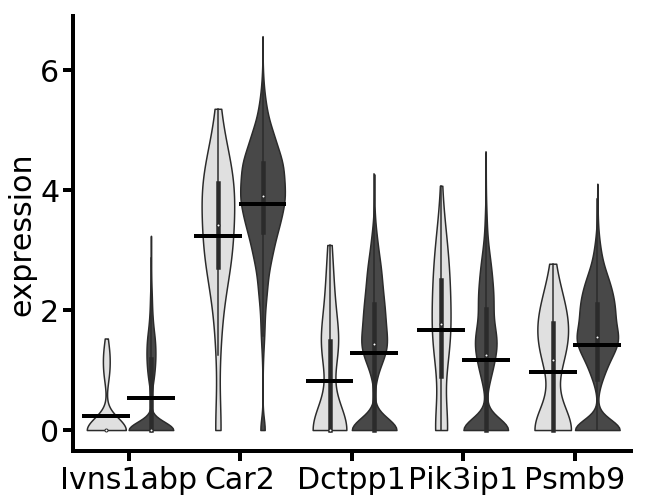

In [25]:
mpl.rcParams['font.size'] = 30
linewidth = 4
for comp, c_df in sig_genes.groupby('comparison'):
    print('Working on:', comp)
    sig_gene_expression = experiment_rna_data_df.merge(
        c_df,
        how='inner',
        validate='m:1'
    )
    l1_l2_df = sig_gene_expression[sig_gene_expression.label_name.isin(comp.split(' '))]
    fig, ax = plt.subplots(figsize=(2 * c_df.gene_id.nunique(), 8))
    linewidth=4
    sns.violinplot(
        y='expression',
        x='gene_name',
        hue='label_name',
        data=l1_l2_df,
        ax=ax,
        palette=COLOR_PALETTES['survived'],
        hue_order=['Exhausted', 'Survived'],
        dodge=True,
        zorder=0,
        cut=0

    )
    medianprops = dict(
        linewidth=0,
    )
    meanprops = dict(
        linestyle='solid',
        linewidth=4,
        color='black'
    )


    sns.boxplot(
        y='expression',
        x='gene_name',
        hue='label_name',
        hue_order=['Exhausted', 'Survived'],
        data=l1_l2_df,
        ax=ax,
        fliersize=0,
        showbox=False,
        whiskerprops={
            "alpha": 0
        },
        dodge=True,
        showcaps=False,
        showmeans=True,
        meanline=True,
        meanprops=meanprops,
        medianprops=medianprops,
    )
    ax.legend().remove()
    sns.despine()
    fmt.change_axis_linewidth(ax, linewidth)
    #ax.tick_params(axis='x', rotation=35)
    ax.set_xlabel('')